In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
hud_data = pd.read_csv(r'C:\Users\willd\OneDrive\Desktop\DataAnalysis\python data\Census\HUD_COC_DATA.csv')

In [3]:
hud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Columns: 332 entries, year to rural
dtypes: float64(257), int64(73), object(2)
memory usage: 7.6+ MB


In [4]:
hud_data.shape

(3008, 332)

list(hud_data.columns)

In [6]:
hud_data['cocnumber'] = hud_data['cocnumber'].str[:2]

In [ ]:
# hud_data['Key'] = hud_data['year'].astype(str) + hud_data['cocnumber']

In [106]:
hud_data.head(5)

,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0


In [62]:
pop_cols = ['year', 'cocnumber', 'pit_tot_hless_pit_hud', 'pit_vet_hless_pit_hud', 'dem_pop_pop_census']
pop_names = ['Year', 'State', 'HL_pop', 'Vet_pop_HL', 'Tot_pop']
avg_cols = ['year', 'cocnumber', 'econ_labor_medinc_acs5yr', 'hou_mkt_medrent_acs5yr']
avg_names = ['Year', 'State', 'Avg_med_income', 'Avg_median_rent']

In [63]:
def noise_and_col_names(df_df, df_cols, col_name):
    df_df = df_df[df_cols]
    df_df.columns = col_name
    return df_df

In [64]:
pop_df = noise_and_col_names(hud_data, pop_cols, pop_names)
avg_df = noise_and_col_names(hud_data, avg_cols, avg_names)

In [67]:
pop_df = pop_df.groupby(['Year', 'State'],as_index=False).sum()
avg_df = avg_df.groupby(['Year', 'State'],as_index=False).mean()

In [68]:
avg_df

,Year,State,Avg_med_income,Avg_median_rent
0,2010,AK,NaN,NaN
1,2010,AL,NaN,NaN
2,2010,AR,NaN,NaN
3,2010,AZ,NaN,NaN
4,2010,CA,NaN,NaN
...,...,...,...,...
403,2017,VT,60006.183990,867.838104
404,2017,WA,63494.050433,909.728536
405,2017,WI,55839.647982,705.543365
406,2017,WV,42798.424905,483.156380


In [72]:
pop_df['Key'] = pop_df['Year'].astype(str) + pop_df['State']
avg_df['Key'] = avg_df['Year'].astype(str) + avg_df['State']

In [85]:
use_cols = avg_df.columns.difference(pop_df.columns)
use_cols = use_cols.tolist()
use_cols.append('Key')

In [93]:
combined_df = pd.merge(pop_df, avg_df[use_cols], on ='Key', how ='outer')

In [103]:
combined_df['Vet_prop'] = combined_df['Vet_pop_HL'] / combined_df['HL_pop'] * 100
combined_df['HL_prop'] = combined_df['HL_pop'] / combined_df['Tot_pop'] * 100
combined_df

,Year,State,HL_pop,Vet_pop_HL,Tot_pop,Key,Avg_med_income,Avg_median_rent,Vet_prop,HL_prop
0,2010,AK,1863.0,0.0,694690,2010AK,NaN,NaN,0.000000,0.268177
1,2010,AL,6046.0,0.0,4656349,2010AL,NaN,NaN,0.000000,0.129844
2,2010,AR,2762.0,0.0,2887331,2010AR,NaN,NaN,0.000000,0.095659
3,2010,AZ,13711.0,0.0,6587653,2010AZ,NaN,NaN,0.000000,0.208132
4,2010,CA,123480.0,0.0,36887615,2010CA,NaN,NaN,0.000000,0.334746
...,...,...,...,...,...,...,...,...,...,...
403,2017,VT,1225.0,94.0,623354,2017VT,60006.183990,867.838104,7.673469,0.196518
404,2017,WA,21112.0,2093.0,7280934,2017WA,63494.050433,909.728536,9.913793,0.289963
405,2017,WI,5027.0,329.0,5772917,2017WI,55839.647982,705.543365,6.544659,0.087079
406,2017,WV,1309.0,137.0,1828637,2017WV,42798.424905,483.156380,10.466005,0.071583


In [104]:
combined_df['Vet_prop'] = combined_df['Vet_prop'].replace(0, np.NaN)

In [107]:
combined_df.head(10)

,Year,State,HL_pop,Vet_pop_HL,Tot_pop,Key,Avg_med_income,Avg_median_rent,Vet_prop,HL_prop
0,2010,AK,1863.0,0.0,694690,2010AK,NaN,NaN,NaN,0.268177
1,2010,AL,6046.0,0.0,4656349,2010AL,NaN,NaN,NaN,0.129844
2,2010,AR,2762.0,0.0,2887331,2010AR,NaN,NaN,NaN,0.095659
3,2010,AZ,13711.0,0.0,6587653,2010AZ,NaN,NaN,NaN,0.208132
4,2010,CA,123480.0,0.0,36887615,2010CA,NaN,NaN,NaN,0.334746
5,2010,CO,15482.0,0.0,5015155,2010CO,NaN,NaN,NaN,0.308704
6,2010,CT,4316.0,0.0,3514826,2010CT,NaN,NaN,NaN,0.122794
7,2010,DC,6539.0,0.0,599975,2010DC,NaN,NaN,NaN,1.089879
8,2010,DE,982.0,0.0,884124,2010DE,NaN,NaN,NaN,0.111070
9,2010,FL,57551.0,0.0,18454538,2010FL,NaN,NaN,NaN,0.311853


In [136]:
def line_chart(state):    
    pick_state = combined_df[combined_df['State'] == state]
    x = pick_state["Year"]
    y1 = pick_state['Vet_prop']
    y2 = pick_state['HL_prop']
    fig, axs = plt.subplots(2)
    fig.suptitle(f'{state} Homeless Population 2010-2017')
    axs[0].plot(x, y1)
    axs[1].plot(x, y2)
    axs[1].set(xlabel = 'Year')
    axs[0].set(ylabel = 'Veteran % of Homeless')
    axs[1].set(ylabel = 'Homeless % of Population')

In [115]:
prop_group_df = combined_df.groupby(['State'],as_index=False)['HL_prop'].mean().sort_values(['HL_prop'], ascending = False)

In [150]:
top_ten = prop_group_df['State'][:5].tolist()
bottom_ten = prop_group_df['State'][-5:].tolist()

for st in top_ten:
    line_chart(st)

for st in bottom_ten:
    line_chart(st)

In [164]:
def one_line_chart(states):    
    fig, axs = plt.subplots(2)
    fig.suptitle('Homeless Population 2010-2017')
    axs[1].set(xlabel = 'Year')
    axs[0].set(ylabel = 'Veteran % of Homeless')
    axs[1].set(ylabel = 'Homeless % of Population')
    
    for state in states:
        pick_state = combined_df[combined_df['State'] == state]
        x = pick_state["Year"]
        y1 = pick_state['Vet_prop']
        y2 = pick_state['HL_prop']
        axs[0].plot(x, y1, label = state)
        axs[1].plot(x, y2, label = state)
    axs[0].legend(loc='upper right')
    axs[1].legend(loc='upper right')
    plt.show()


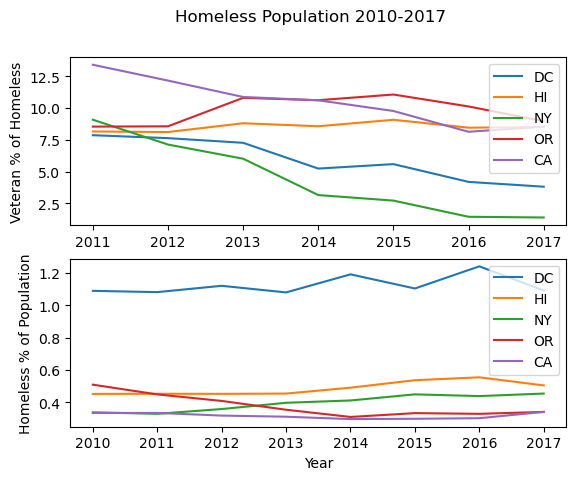

In [165]:
one_line_chart(top_ten)

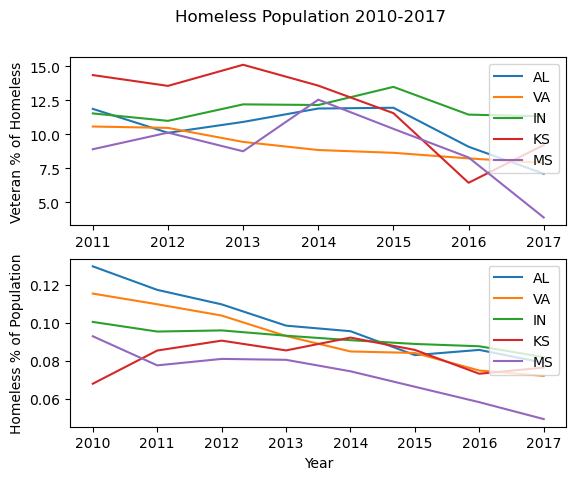

In [166]:
one_line_chart(bottom_ten)